### Libraries

In [ ]:
import importlib
import os
import sys

sys.path.insert(0, '../src')
import dataset

importlib.reload(dataset)

### Load the dataset

In [31]:
external_disk_path = "/media/tiagociiic/easystore"
dataset_dir = os.path.join(external_disk_path, "PA4Inpaint_subset")
train_dir = os.path.join(dataset_dir, "train_subset")


In [33]:
import seedir

seedir.seedir(train_dir, itemlimit=3, style='lines', indent=4)

train_subset/
├───images/
│   ├───w_windmill_00003069.png
│   ├───w_windmill_00003452.png
│   └───w_windmill_00004369.png
├───labels/
│   ├───w_windmill_00003069.png
│   ├───w_windmill_00003452.png
│   └───w_windmill_00004369.png
└───masks/
    ├───w_windmill_00003069.png
    ├───w_windmill_00003452.png
    └───w_windmill_00004369.png


In [83]:
import os
import random


def plot_images_and_histograms(dir: str, num_images: int, plot_title: str = "Random Images and Histograms",
                               seed: int = 123):
    # Get a list of PNG files in the training images directory
    image_files = [f for f in os.listdir(dir) if f.endswith('.png')]

    # Check if there are enough images to plot
    if num_images > len(image_files):
        print(f"Warning: Only {len(image_files)} images available. Plotting all images.")
        num_images = len(image_files)

    # Select random images
    random.seed(seed)
    random_images = random.sample(image_files, num_images)

    # Create a list to store the grayscale images
    grayscale_images = []

    # Read and convert images to grayscale
    for image_file in random_images:
        image_path = os.path.join(dir, image_file)
        image = io.imread(image_path, as_gray=True)
        grayscale_images.append(image)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 3 * num_images))

    # Plot histograms and images
    for i, img in enumerate(grayscale_images):
        # Plot histogram
        axes[i, 0].hist(img.ravel(), bins=256, color='blue', alpha=0.6)
        axes[i, 0].set_title(f"{random_images[i]} histogram ")
        axes[i, 0].set_xlabel("Pixel Value")
        axes[i, 0].set_ylabel("Frequency")

        # Plot image
        axes[i, 1].imshow(img, cmap='gray')
        axes[i, 1].set_title(f"{random_images[i]}")
        # axes[i, 1].axis('off')  # Turn off axis for a cleaner image display

    # Set plot title and layout
    fig.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title

    # Show the plot
    plt.show()


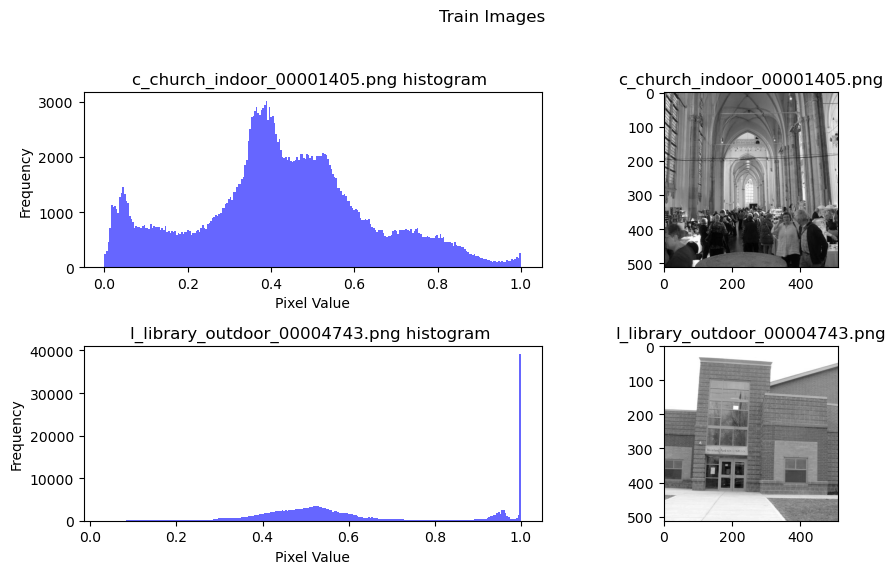

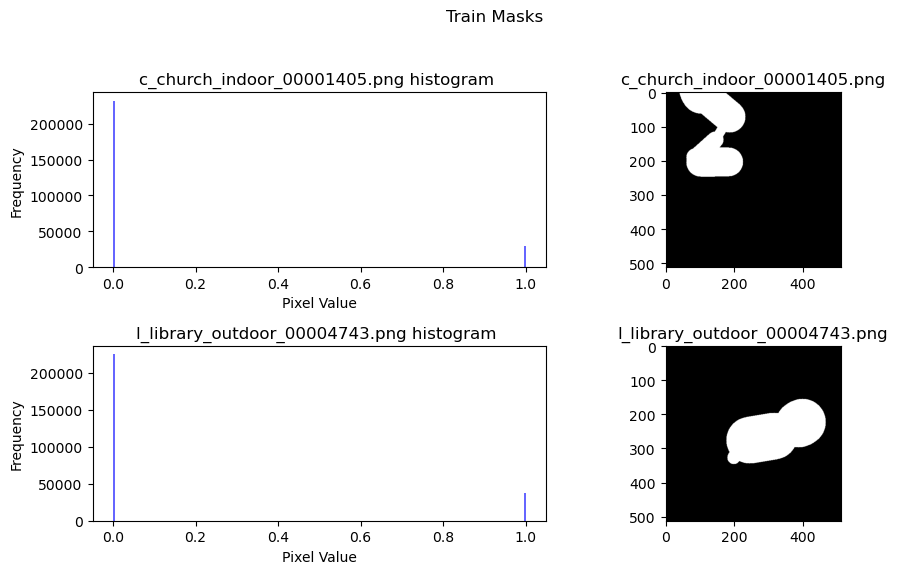

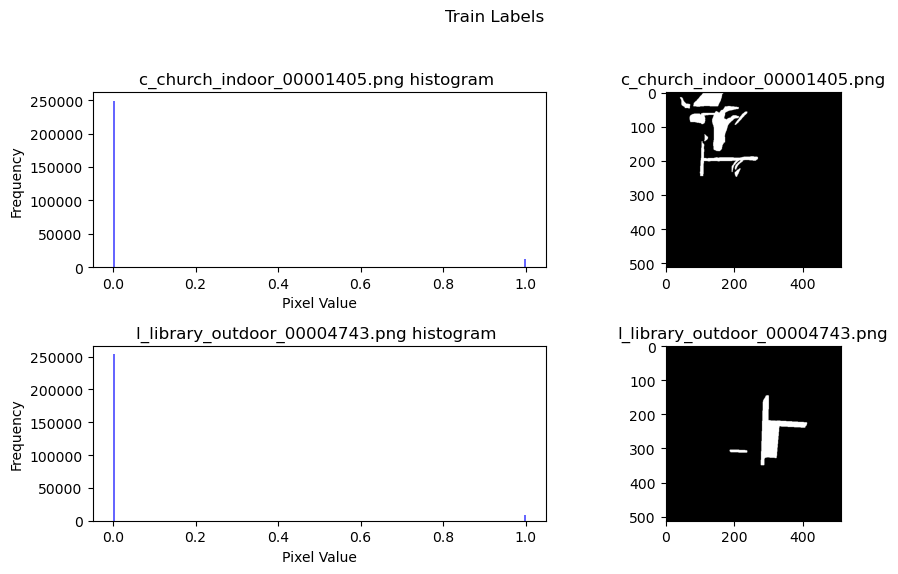

In [84]:
plot_images_and_histograms(dir=os.path.join(train_dir, "images"), num_images=2, plot_title="Train Images ", seed=42)

In [91]:
def plot_images_and_histograms(image_dir: str, mask_dir: str, label_dir: str, num_images: int,
                               plot_title: str = "Images, Masks, and Labels", seed: int = 123):
    # Get a list of PNG files in the image directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    # Check if there are enough images to plot
    if num_images > len(image_files):
        print(f"Warning: Only {len(image_files)} images available. Plotting all images.")
        num_images = len(image_files)

    # Select random images
    random.seed(seed)
    random_images = random.sample(image_files, num_images)

    # Create lists to store the grayscale images, masks, and labels
    grayscale_images = []
    grayscale_masks = []
    grayscale_labels = []

    # Read and convert images, masks, and labels to grayscale
    for image_file in random_images:
        image_path = os.path.join(image_dir, image_file)
        mask_path = os.path.join(mask_dir, image_file)
        label_path = os.path.join(label_dir, image_file)

        image = io.imread(image_path)
        mask = io.imread(mask_path, as_gray=True)
        label = io.imread(label_path, as_gray=True)

        grayscale_images.append(image)
        grayscale_masks.append(mask)
        grayscale_labels.append(label)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_images, 3, figsize=(15, 5 * num_images))

    # Plot images, masks, and labels
    for i, (img, mask, label) in enumerate(zip(grayscale_images, grayscale_masks, grayscale_labels)):
        # Plot image
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"{random_images[i]} Image")

        # Plot mask
        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title(f"{random_images[i]} Mask")

        # Plot label
        axes[i, 2].imshow(label, cmap='gray')
        axes[i, 2].set_title(f"{random_images[i]} Label")

    # Set plot title and layout
    fig.suptitle(plot_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title

    # Show the plot
    plt.show()


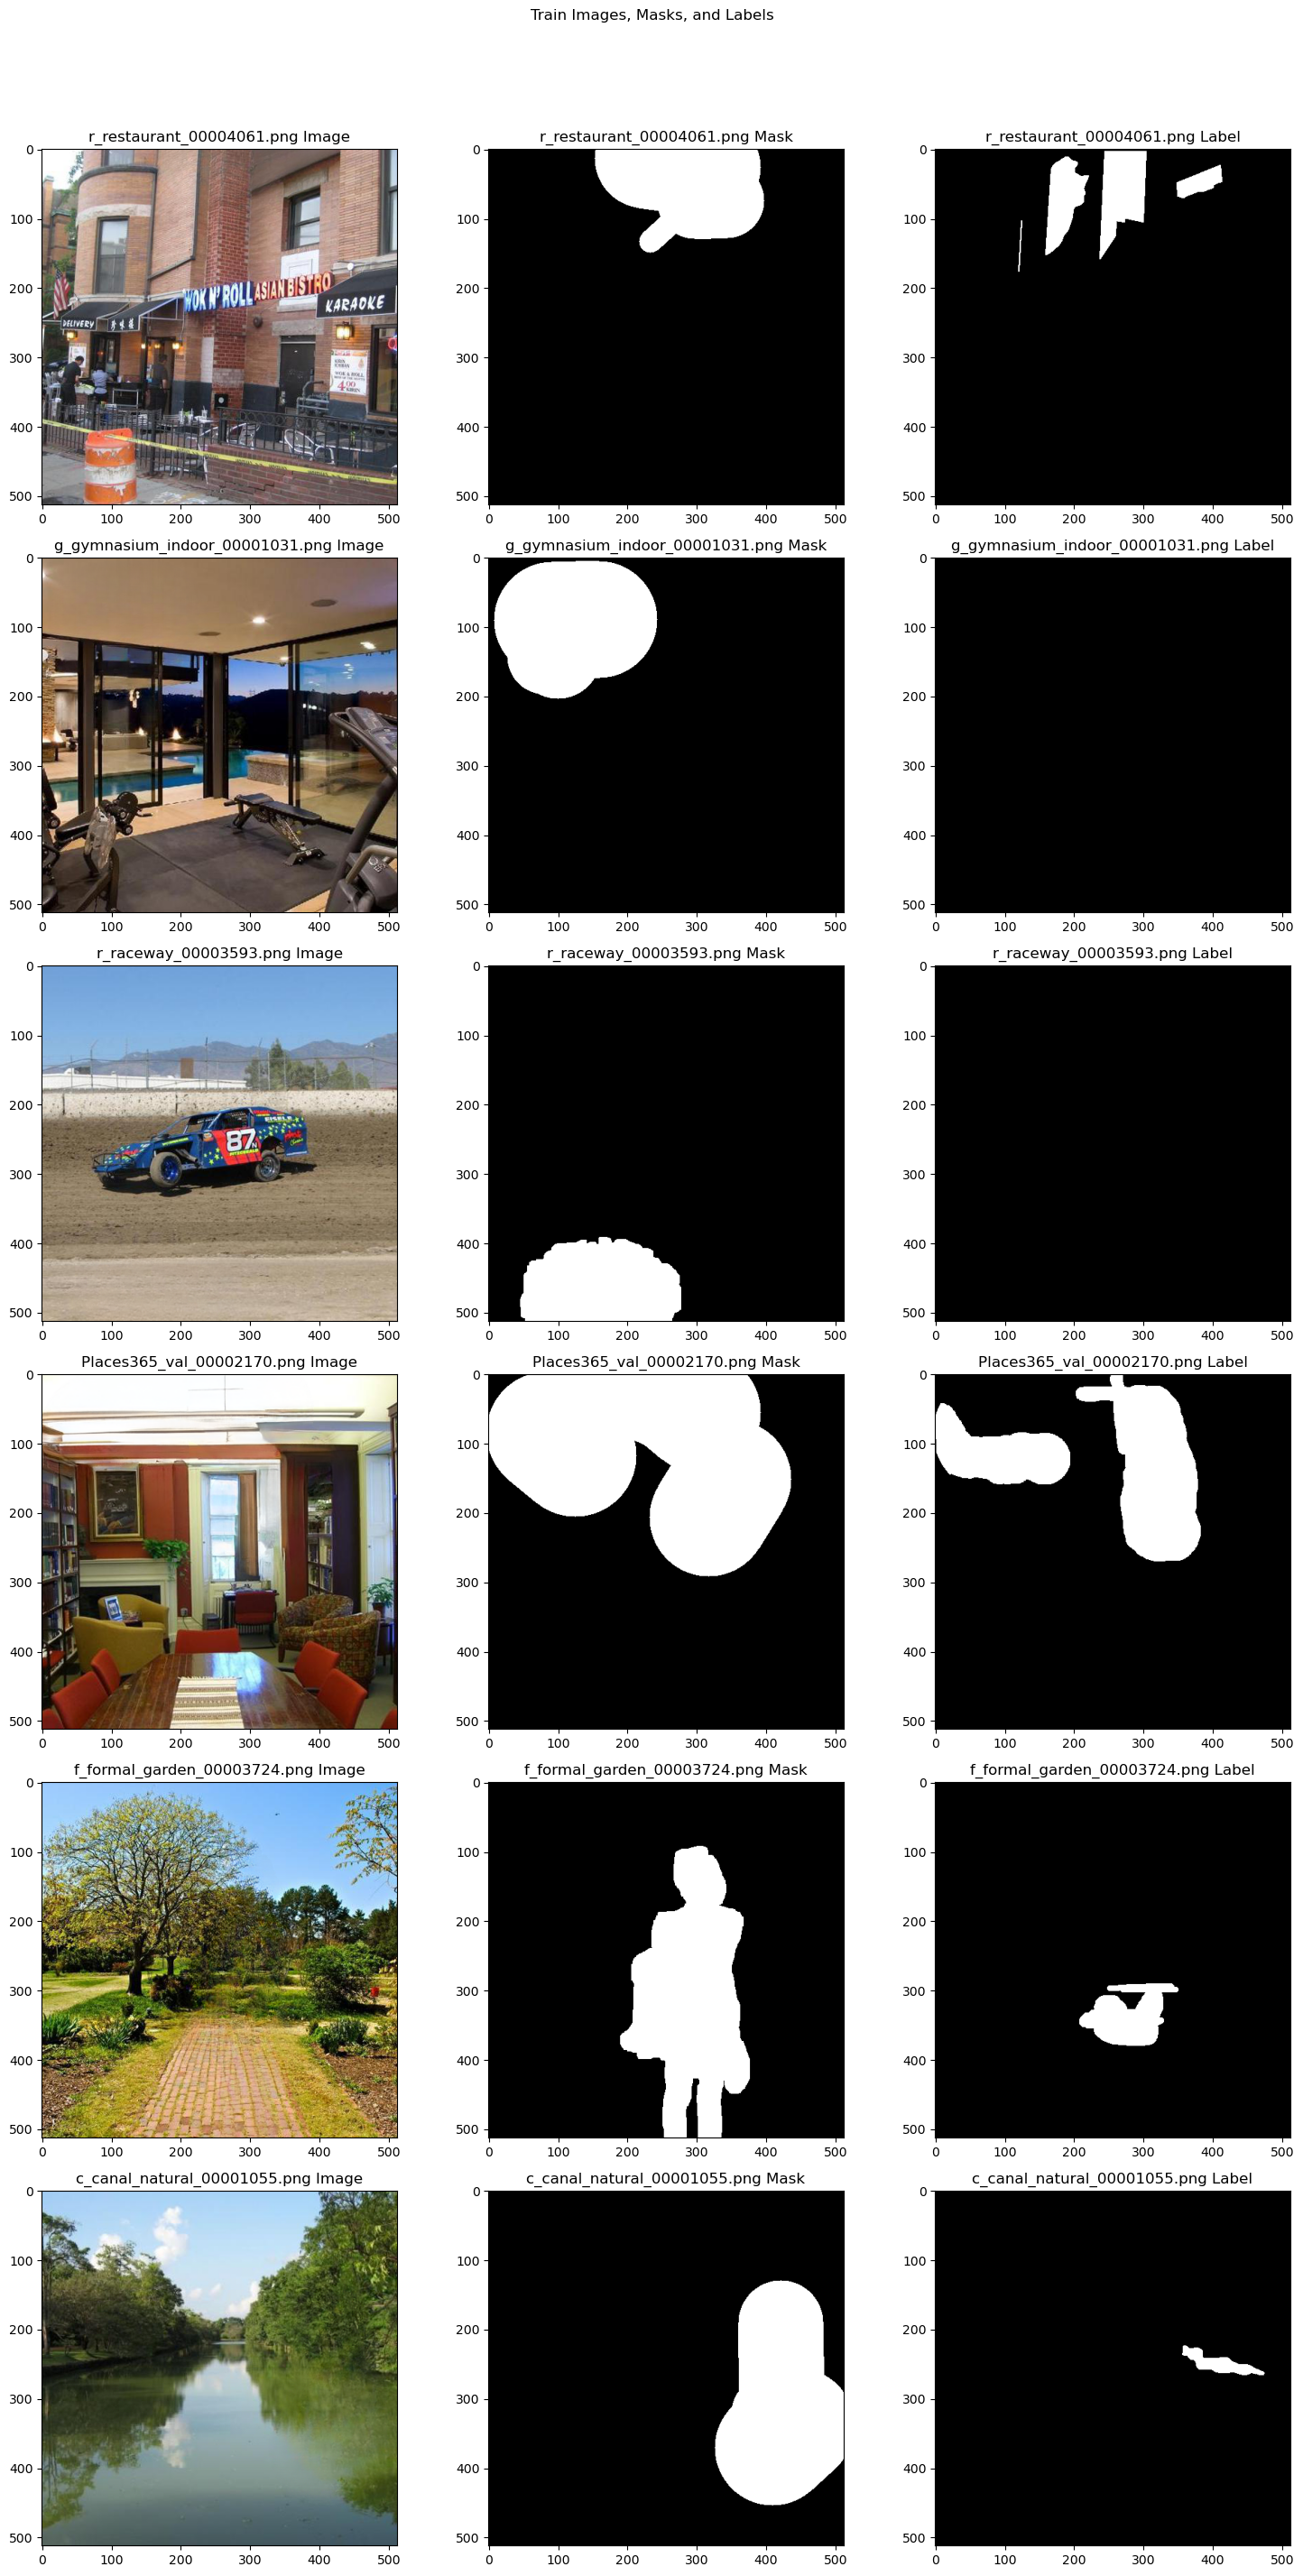

In [94]:
plot_images_and_histograms(image_dir=os.path.join(train_dir, "images"), mask_dir=os.path.join(train_dir, "masks"),
                           label_dir=os.path.join(train_dir, "labels"), num_images=6,
                           plot_title="Train Images, Masks, and Labels", seed=41)

In [ ]:
notebooks / a_airfield_00000045_label.png
notebooks / a_airfield_00000045_mask.png
notebooks / a_airfield_00000394.png

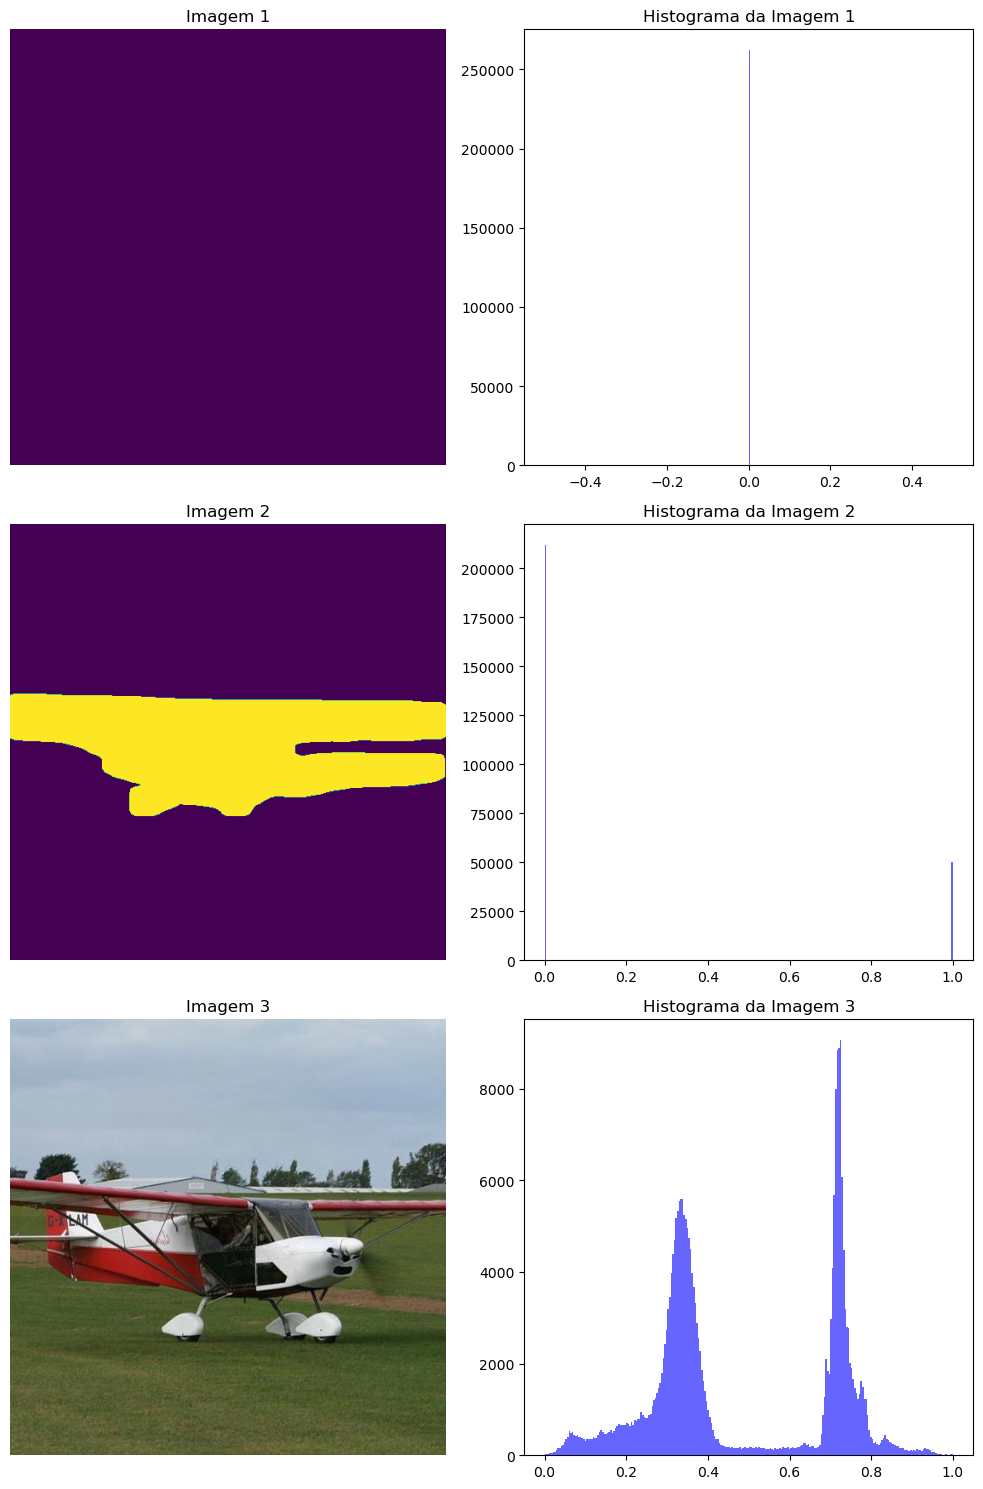

In [97]:
import matplotlib.pyplot as plt
from skimage import io

image_paths = [
    'a_airfield_00000045_label.png',
    'a_airfield_00000045_mask.png',
    'a_airfield_00000394.png'
]

images = [io.imread(path) for path in image_paths]
fig, axes = plt.subplots(len(images), 2, figsize=(10, 15))  # Ajuste o tamanho conforme necessário
for i, (ax1, ax2) in enumerate(axes):
    if i < len(images):
        ax1.imshow(images[i])
        ax1.axis('off')
        ax1.set_title(f"Imagem {i + 1}")

        gray_image = io.imread(image_paths[i], as_gray=True)
        ax2.hist(gray_image.ravel(), bins=256, color='blue', alpha=0.6)
        ax2.set_title(f"Histograma da Imagem {i + 1}")
plt.tight_layout()
plt.show()
